In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import keras
keras.__version__
from keras import models
from keras import layers


In [25]:
from keras.datasets import mnist
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [26]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
#spliiting training data into train and test
test_images = train_images[55000:,]
test_labels = train_labels[55000:,]
train_images = train_images[:55000,]
train_labels = train_labels[:55000,]

In [29]:
test_images.shape

(5000, 28, 28)

In [30]:
train_labels

array([5, 0, 4, ..., 0, 4, 0], dtype=uint8)

In [31]:
len(test_labels)
test_labels

array([1, 2, 8, ..., 5, 6, 8], dtype=uint8)

In [32]:
train_images = train_images.reshape((55000, 28, 28, 1))
train_images = train_images.astype('float32')/255
train_images.shape

(55000, 28, 28, 1)

In [33]:
test_images = test_images.reshape((5000, 28, 28, 1))
test_images = test_images.astype('float32')/255
test_images.shape

(5000, 28, 28, 1)

In [34]:
val_images = val_images.reshape((10000, 28, 28, 1))
val_images = val_images.astype('float32')/255
val_images.shape

(10000, 28, 28, 1)

In [35]:
#convert labels into even/odd
odd = set([1, 3, 5, 7, 9])
#if train_labels[0] in odd:
#  print("in odd")
#else:
#  print("in even")
for i in range(len(train_labels)):
  if train_labels[i] in odd:
    train_labels[i] = 1
  else:
    train_labels[i] = 0
for i in range(len(val_labels)):
  if val_labels[i] in odd:
    val_labels[i] = 1
  else:
    val_labels[i] = 0
for i in range(len(test_labels)):
  if test_labels[i] in odd:
    test_labels[i] = 1
  else:
    test_labels[i] = 0

In [36]:
test_labels

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [37]:
train_labels

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [38]:
val_labels

array([1, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [39]:
#MNIST Model 1
mmodel = models.Sequential()
#mmodel.Input(shape=(28, 28, 1))
mmodel.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
mmodel.add(layers.MaxPool2D(pool_size = (2,2)))
mmodel.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
mmodel.add(layers.MaxPool2D(pool_size = (2,2)))
mmodel.add(layers.Dropout(0.5))
mmodel.add(layers.Dense(64, activation="relu"))
mmodel.add(layers.Flatten())
mmodel.add(layers.Dense(1, activation="sigmoid"))
mmodel.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 dense_4 (Dense)             (None, 5, 5, 64)         

In [ ]:
#import tensorflow as tf
#train_images = tf.stack(train_images)
#train_labels = tf.stack(train_labels)

In [40]:
from keras.backend import learning_phase
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
mmodel.compile(optimizer='sgd', loss = 'binary_crossentropy',metrics=['accuracy'])

In [41]:
train_images.shape

(55000, 28, 28, 1)

In [42]:
history = mmodel.fit(train_images, train_labels, epochs = 5, batch_size=128, validation_data=(val_images, val_labels))

Epoch 1/5
430/430 [==============================] - 46s 104ms/step - loss: 0.5764 - accuracy: 0.7140 - val_loss: 0.4207 - val_accuracy: 0.8073
Epoch 2/5
430/430 [==============================] - 53s 124ms/step - loss: 0.4182 - accuracy: 0.8091 - val_loss: 0.3464 - val_accuracy: 0.8545
Epoch 3/5
430/430 [==============================] - 44s 103ms/step - loss: 0.3700 - accuracy: 0.8371 - val_loss: 0.3009 - val_accuracy: 0.8801
Epoch 4/5
430/430 [==============================] - 46s 106ms/step - loss: 0.3297 - accuracy: 0.8576 - val_loss: 0.2632 - val_accuracy: 0.9023
Epoch 5/5
430/430 [==============================] - 52s 122ms/step - loss: 0.2903 - accuracy: 0.8801 - val_loss: 0.2354 - val_accuracy: 0.9143


In [44]:
histm = mmodel.evaluate(test_images, test_labels)

157/157 [==============================] - 2s 10ms/step - loss: 0.2126 - accuracy: 0.9244


In [45]:
mmodel.save('mmodel.h5')
mmodel.save('/home/kajol/Downloads/mmodel.h5')

In [46]:
from keras.saving.save import load_model
m = load_model('mmodel.h5')

Text(0, 0.5, 'loss')

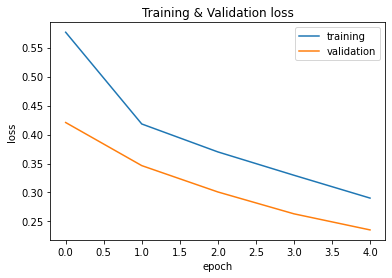

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Final loss and accuracy values of the final training step
loss: 0.2903 - accuracy: 0.8801 - val_loss: 0.2354 - val_accuracy: 0.9143

Part 2: Hyperparameter tuning

In [46]:
#best model Model 2 - changed architecture, added batch normalization, used weight initializers, added dropouts,      
m2model = models.Sequential()
#mmodel.Input(shape=(28, 28, 1))
m2model.add(layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer = 'he_normal', activation="relu", input_shape=(28, 28, 1)))
m2model.add(layers.BatchNormalization())
m2model.add(layers.MaxPool2D(pool_size = (2,2)))
m2model.add(layers.Dropout(0.2))
m2model.add(layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer = 'he_normal', activation="relu"))
m2model.add(layers.BatchNormalization())
m2model.add(layers.MaxPool2D(pool_size = (2,2)))
m2model.add(layers.Dropout(0.2))
m2model.add(layers.Conv2D(128, kernel_size=(3, 3), kernel_initializer = 'he_normal', activation="relu", input_shape=(28, 28, 1)))
m2model.add(layers.BatchNormalization())
m2model.add(layers.MaxPool2D(pool_size = (2,2)))
m2model.add(layers.Dropout(0.2))
m2model.add(layers.Dense(128, kernel_initializer = 'he_normal', activation="relu"))
m2model.add(layers.Dropout(0.2))
m2model.add(layers.Flatten())
m2model.add(layers.Dense(1, activation="sigmoid"))
m2model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_11 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_12 (Bat  (None, 11, 11, 64)      

In [47]:
#different optimizer, different learning rate, changed number of epochs
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
m2model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [48]:
history2 = m2model.fit(train_images, train_labels, epochs = 10, batch_size=128, validation_data=(val_images, val_labels))

Epoch 1/10
430/430 [==============================] - 79s 181ms/step - loss: 0.1696 - accuracy: 0.9339 - val_loss: 0.0698 - val_accuracy: 0.9751
Epoch 2/10
430/430 [==============================] - 73s 169ms/step - loss: 0.0746 - accuracy: 0.9734 - val_loss: 0.0352 - val_accuracy: 0.9876
Epoch 3/10
430/430 [==============================] - 70s 164ms/step - loss: 0.0562 - accuracy: 0.9797 - val_loss: 0.0345 - val_accuracy: 0.9880
Epoch 4/10
430/430 [==============================] - 70s 164ms/step - loss: 0.0465 - accuracy: 0.9838 - val_loss: 0.0263 - val_accuracy: 0.9911
Epoch 5/10
430/430 [==============================] - 71s 165ms/step - loss: 0.0410 - accuracy: 0.9858 - val_loss: 0.0270 - val_accuracy: 0.9911
Epoch 6/10
430/430 [==============================] - 71s 164ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0260 - val_accuracy: 0.9922
Epoch 7/10
430/430 [==============================] - 70s 164ms/step - loss: 0.0319 - accuracy: 0.9889 - val_loss: 0.0265 - val_ac

In [49]:
histm2 = m2model.evaluate(test_images, test_labels)

157/157 [==============================] - 2s 13ms/step - loss: 0.0248 - accuracy: 0.9926


In [50]:
#MNIST Model 3 - using different stride and bigger kernel size - achieved good accuracy
m3model = models.Sequential()
#mmodel.Input(shape=(28, 28, 1))
m3model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(2, 2), kernel_initializer = 'he_normal', padding='valid', activation="relu", input_shape=(28, 28, 1)))
#m3model.add(layers.BatchNormalization())
#m3model.add(layers.MaxPool2D(pool_size = (2,2)))
#m3model.add(layers.Dropout(0.2))
m3model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2), kernel_initializer = 'he_normal', padding ='valid', activation="relu"))
#m3model.add(layers.BatchNormalization())
#m3model.add(layers.MaxPool2D(pool_size = (2,2)))
#m3model.add(layers.Dropout(0.2))
#m3model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2), kernel_initializer = 'he_normal', padding ='valid', activation="relu", input_shape=(28, 28, 1)))
m3model.add(layers.LayerNormalization())
m3model.add(layers.MaxPool2D(pool_size = (2,2)))
m3model.add(layers.Dropout(0.2))
m3model.add(layers.Dense(128, kernel_initializer = 'he_normal', activation="relu"))
m3model.add(layers.Dropout(0.2))
m3model.add(layers.Flatten())
m3model.add(layers.Dense(1, activation="sigmoid"))
m3model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 12, 12, 32)        832       
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          51264     
                                                                 
 layer_normalization (LayerN  (None, 4, 4, 64)         128       
 ormalization)                                                   
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 dense_8 (Dense)             (None, 2, 2, 128)        

In [51]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
m3model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [52]:
history3 = m3model.fit(train_images, train_labels, epochs = 8, batch_size=128, validation_data=(val_images, val_labels))

Epoch 1/8
430/430 [==============================] - 20s 45ms/step - loss: 0.1807 - accuracy: 0.9261 - val_loss: 0.0580 - val_accuracy: 0.9788
Epoch 2/8
430/430 [==============================] - 18s 41ms/step - loss: 0.0726 - accuracy: 0.9745 - val_loss: 0.0378 - val_accuracy: 0.9860
Epoch 3/8
430/430 [==============================] - 25s 59ms/step - loss: 0.0518 - accuracy: 0.9817 - val_loss: 0.0361 - val_accuracy: 0.9873
Epoch 4/8
430/430 [==============================] - 18s 41ms/step - loss: 0.0426 - accuracy: 0.9852 - val_loss: 0.0322 - val_accuracy: 0.9884
Epoch 5/8
430/430 [==============================] - 18s 41ms/step - loss: 0.0349 - accuracy: 0.9878 - val_loss: 0.0302 - val_accuracy: 0.9903
Epoch 6/8
430/430 [==============================] - 17s 40ms/step - loss: 0.0279 - accuracy: 0.9903 - val_loss: 0.0267 - val_accuracy: 0.9911
Epoch 7/8
430/430 [==============================] - 24s 57ms/step - loss: 0.0256 - accuracy: 0.9910 - val_loss: 0.0265 - val_accuracy: 0.9911

In [53]:
histm3 = m3model.evaluate(test_images, test_labels)

157/157 [==============================] - 1s 5ms/step - loss: 0.0346 - accuracy: 0.9908


In [54]:
#MNIST model 4 - using hinge loss function and different weight initializer
m4model = models.Sequential()
#mmodel.Input(shape=(28, 28, 1))
m4model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(2, 2), kernel_initializer = 'random_normal', padding='valid', activation="relu", input_shape=(28, 28, 1)))
#m3model.add(layers.BatchNormalization())
#m3model.add(layers.MaxPool2D(pool_size = (2,2)))
#m3model.add(layers.Dropout(0.2))
m4model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2), kernel_initializer = 'random_normal', padding ='valid', activation="relu"))
#m3model.add(layers.BatchNormalization())
#m3model.add(layers.MaxPool2D(pool_size = (2,2)))
#m3model.add(layers.Dropout(0.2))
#m3model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2), kernel_initializer = 'he_normal', padding ='valid', activation="relu", input_shape=(28, 28, 1)))
m4model.add(layers.LayerNormalization())
m4model.add(layers.MaxPool2D(pool_size = (2,2)))
m4model.add(layers.Dropout(0.6))
m4model.add(layers.Dense(128, kernel_initializer = 'random_normal', activation="relu"))
m4model.add(layers.Dropout(0.6))
m4model.add(layers.Flatten())
m4model.add(layers.Dense(1, activation="sigmoid"))
m4model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 12, 12, 32)        832       
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 64)          51264     
                                                                 
 layer_normalization_1 (Laye  (None, 4, 4, 64)         128       
 rNormalization)                                                 
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 dense_10 (Dense)            (None, 2, 2, 128)        

In [55]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
m4model.compile(optimizer=adam, loss = 'hinge', metrics=['accuracy'])

In [56]:
history4 = m4model.fit(train_images, train_labels, epochs = 5, batch_size=128, validation_data=(val_images, val_labels))

Epoch 1/5
430/430 [==============================] - 19s 42ms/step - loss: 0.6200 - accuracy: 0.8728 - val_loss: 0.5433 - val_accuracy: 0.9493
Epoch 2/5
430/430 [==============================] - 17s 40ms/step - loss: 0.5727 - accuracy: 0.9190 - val_loss: 0.5352 - val_accuracy: 0.9578
Epoch 3/5
430/430 [==============================] - 17s 41ms/step - loss: 0.5743 - accuracy: 0.9173 - val_loss: 0.5442 - val_accuracy: 0.9482
Epoch 4/5
430/430 [==============================] - 20s 47ms/step - loss: 0.5662 - accuracy: 0.9253 - val_loss: 0.5328 - val_accuracy: 0.9600
Epoch 5/5
430/430 [==============================] - 18s 42ms/step - loss: 0.5682 - accuracy: 0.9234 - val_loss: 0.5382 - val_accuracy: 0.9544


In [57]:
histm4 = m4model.evaluate(test_images, test_labels)

157/157 [==============================] - 1s 6ms/step - loss: 0.5309 - accuracy: 0.9604


In [58]:
#MNIST Model 5 - increasing the receptive field by using the dilation_rate, used Layer normalization - achieved good accuracy
m5model = models.Sequential()
#mmodel.Input(shape=(28, 28, 1))
m5model.add(layers.Conv2D(32, kernel_size=(3, 3), dilation_rate = 2, kernel_initializer = 'he_normal', padding='valid', activation="relu", input_shape=(28, 28, 1)))
#m3model.add(layers.BatchNormalization())
#m3model.add(layers.MaxPool2D(pool_size = (2,2)))
#m3model.add(layers.Dropout(0.2))
m5model.add(layers.Conv2D(64, kernel_size=(3, 3), dilation_rate = 2, kernel_initializer = 'he_normal', padding ='valid', activation="relu"))
#m3model.add(layers.BatchNormalization())
#m3model.add(layers.MaxPool2D(pool_size = (2,2)))
#m3model.add(layers.Dropout(0.2))
#m3model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2), kernel_initializer = 'he_normal', padding ='valid', activation="relu", input_shape=(28, 28, 1)))
m5model.add(layers.LayerNormalization())
m5model.add(layers.MaxPool2D(pool_size = (2,2)))
m5model.add(layers.Dropout(0.2))
m5model.add(layers.Dense(128, kernel_initializer = 'he_normal', activation="relu"))
m5model.add(layers.Dropout(0.2))
m5model.add(layers.Flatten())
m5model.add(layers.Dense(1, activation="sigmoid"))
m5model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 24, 24, 32)        320       
                                                                 
 conv2d_27 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 layer_normalization_2 (Laye  (None, 20, 20, 64)       128       
 rNormalization)                                                 
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 10, 10, 64)        0         
                                                                 
 dense_12 (Dense)            (None, 10, 10, 128)      

In [59]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
m5model.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'])

In [60]:
history5 = m5model.fit(train_images, train_labels, epochs = 5, batch_size=128, validation_data=(val_images, val_labels))

Epoch 1/5
430/430 [==============================] - 173s 400ms/step - loss: 0.3834 - accuracy: 0.9035 - val_loss: 0.0797 - val_accuracy: 0.9729
Epoch 2/5
430/430 [==============================] - 185s 431ms/step - loss: 0.0865 - accuracy: 0.9700 - val_loss: 0.0577 - val_accuracy: 0.9817
Epoch 3/5
430/430 [==============================] - 199s 462ms/step - loss: 0.0726 - accuracy: 0.9755 - val_loss: 0.0481 - val_accuracy: 0.9831
Epoch 4/5
430/430 [==============================] - 189s 440ms/step - loss: 0.0557 - accuracy: 0.9817 - val_loss: 0.0405 - val_accuracy: 0.9862
Epoch 5/5
430/430 [==============================] - 182s 423ms/step - loss: 0.0512 - accuracy: 0.9827 - val_loss: 0.0375 - val_accuracy: 0.9870


In [99]:
score3 = m3model.evaluate(test_images, test_labels, verbose = 0)
score3

[0.03457548841834068, 0.9908000230789185]

In [62]:
score2 = m2model.evaluate(test_images, test_labels, verbose = 0)
score2
#best accuracy
#pred = m2model.predict(test_images[1])

[0.02483520843088627, 0.9926000237464905]

In [63]:
score4 = m4model.evaluate(test_images, test_labels, verbose = 0)
score4

[0.5309025645256042, 0.9603999853134155]

In [64]:
score5 = m5model.evaluate(test_images, test_labels, verbose = 0)
score5

[0.03872005268931389, 0.9878000020980835]

PART 3


In [65]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [100]:
filename = "img3.jpg"
#filename = "three.png"
image = cv2.imread(filename)
image.shape
#cv2_imshow(image)

(28, 28, 3)

In [101]:
image.shape
image = cv2.resize(image, (28, 28))
cv2_imshow(image)

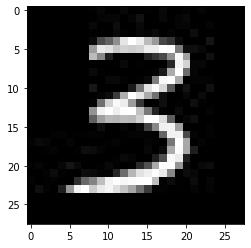

In [102]:
import matplotlib
matplotlib.pyplot.imshow(image)

In [103]:
image.shape

(28, 28, 3)

In [104]:
gimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gimage.shape

(28, 28)

In [105]:
#gimage = gimage.reshape((28, 28, 1))
gimage.shape
cv2_imshow(gimage)

In [106]:
gimage = cv2.GaussianBlur(gimage, (3,3), 0)
#gimage = gimage.reshape((28, 28, 1))
gimage.shape
cv2_imshow(gimage)

In [107]:
bimage = cv2.adaptiveThreshold(gimage, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)                                                                          

In [108]:
cv2_imshow(bimage)

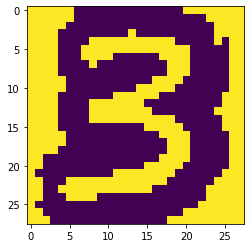

In [109]:
matplotlib.pyplot.imshow(bimage)

In [110]:
bimage = bimage.reshape((1, 28, 28, 1))
bimage.shape

(1, 28, 28, 1)

In [111]:
#from keras.preprocessing import image
bimage = bimage.astype('float32')/255
bimage.shape
#bimage = image.img_to_array(bimage)
#bimage = np.expand_dims(bimage, axis = 0)


(1, 28, 28, 1)

In [112]:
#bimage = preprocess_input

In [113]:
bpred = mmodel.predict(bimage)
print(bpred)

[[0.967953]]


In [114]:
if bpred < 0.5:
  print("even number")
else:
  print("odd number")

odd number


Part 4: CIFAR10

In [4]:
#tf.keras.datasets.cifar10.load_data()
from keras.datasets import cifar10
(ctrain_images, ctrain_labels), (ctest_images, ctest_labels) = cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [4]:
#(ctrain_images, ctrain_labels), (ctest_images, ctest_labels) = cifar10.load_data()

In [5]:
ctrain_images.shape


(50000, 32, 32, 3)

In [6]:
#len(ctrain_labels)
ctrain_labels


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
ctest_images.shape


(10000, 32, 32, 3)

In [8]:
#len(ctest_labels)
ctest_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [10]:
from tensorflow.keras.optimizers import SGD

In [9]:
#ctrain_images = ctrain_images.reshape((60000, 28, 28, 1))
ctrain_images = ctrain_images.astype('float32')/255
ctrain_images.shape

(50000, 32, 32, 3)

In [11]:
ctest_images = ctest_images.astype('float32')/255
ctest_images.shape

(10000, 32, 32, 3)

In [12]:
from tensorflow.keras.utils import to_categorical
ctrain_labels = to_categorical(ctrain_labels)
ctrain_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
ctest_labels = to_categorical(ctest_labels)
ctest_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [82]:
cmodel = models.Sequential()
#mmodel.Input(shape=(28, 28, 1))
cmodel.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
cmodel.add(layers.MaxPool2D(pool_size = (2,2)))
cmodel.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
cmodel.add(layers.MaxPool2D(pool_size = (2,2)))
cmodel.add(layers.Dropout(0.5))
cmodel.add(layers.Dense(16, activation="relu"))
cmodel.add(layers.Flatten())
cmodel.add(layers.Dense(10, activation="softmax"))
cmodel.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 dense_14 (Dense)            (None, 6, 6, 16)         

In [83]:
from keras.backend import learning_phase
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
cmodel.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [84]:
ctrain_images.shape

(50000, 32, 32, 3)

In [85]:
ctrain_labels.shape

(50000, 10)

In [86]:
chistory = cmodel.fit(ctrain_images, ctrain_labels, epochs = 5, batch_size=128, validation_data=(ctest_images, ctest_labels))

Epoch 1/5
391/391 [==============================] - 61s 156ms/step - loss: 2.0124 - accuracy: 0.2614 - val_loss: 1.6792 - val_accuracy: 0.4072
Epoch 2/5
391/391 [==============================] - 63s 160ms/step - loss: 1.5886 - accuracy: 0.4285 - val_loss: 1.4746 - val_accuracy: 0.4769
Epoch 3/5
391/391 [==============================] - 60s 154ms/step - loss: 1.4331 - accuracy: 0.4866 - val_loss: 1.3374 - val_accuracy: 0.5201
Epoch 4/5
391/391 [==============================] - 62s 158ms/step - loss: 1.3464 - accuracy: 0.5199 - val_loss: 1.2864 - val_accuracy: 0.5443
Epoch 5/5
391/391 [==============================] - 60s 154ms/step - loss: 1.2805 - accuracy: 0.5449 - val_loss: 1.2021 - val_accuracy: 0.5764


In [87]:
cmodel.save("cmodel")

INFO:tensorflow:Assets written to: cmodel/assets


In [88]:
#best model - added many convolution, pooling, dropout layers

c1model = models.Sequential()
#mmodel.Input(shape=(28, 28, 1))
c1model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
c1model.add(layers.BatchNormalization())
c1model.add(layers.MaxPool2D(pool_size = (2,2)))
c1model.add(layers.Dropout(0.2))
c1model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
c1model.add(layers.BatchNormalization())
c1model.add(layers.MaxPool2D(pool_size = (2,2)))
c1model.add(layers.Dropout(0.2))
c1model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
#cmodel.add(layers.BatchNormalization())
#cmodel.add(layers.MaxPool2D(pool_size = (2,2)))
#cmodel.add(layers.Dropout(0.2))
c1model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
c1model.add(layers.BatchNormalization())
c1model.add(layers.MaxPool2D(pool_size = (2,2)))
c1model.add(layers.Dropout(0.2))
c1model.add(layers.Flatten())
c1model.add(layers.Dense(10, activation="softmax"))
c1model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_15 (Bat  (None, 13, 13, 64)      

In [89]:
from keras.backend import learning_phase
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
c1model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [91]:
c1history = c1model.fit(ctrain_images, ctrain_labels, epochs = 8, batch_size=128, validation_data=(ctest_images, ctest_labels))

Epoch 1/8
391/391 [==============================] - 124s 317ms/step - loss: 1.5187 - accuracy: 0.4568 - val_loss: 1.5496 - val_accuracy: 0.4239
Epoch 2/8
391/391 [==============================] - 118s 302ms/step - loss: 1.1811 - accuracy: 0.5865 - val_loss: 1.1557 - val_accuracy: 0.5855
Epoch 3/8
391/391 [==============================] - 118s 303ms/step - loss: 1.0441 - accuracy: 0.6326 - val_loss: 1.0939 - val_accuracy: 0.6207
Epoch 4/8
391/391 [==============================] - 116s 297ms/step - loss: 0.9473 - accuracy: 0.6663 - val_loss: 1.0007 - val_accuracy: 0.6510
Epoch 5/8
391/391 [==============================] - 119s 305ms/step - loss: 0.8856 - accuracy: 0.6917 - val_loss: 0.9062 - val_accuracy: 0.6833
Epoch 6/8
391/391 [==============================] - 114s 291ms/step - loss: 0.8276 - accuracy: 0.7100 - val_loss: 0.8856 - val_accuracy: 0.6887
Epoch 7/8
391/391 [==============================] - 116s 296ms/step - loss: 0.7820 - accuracy: 0.7237 - val_loss: 0.8091 - val_ac

In [92]:
predc1 = c1model.evaluate(ctest_images, ctest_labels)
print("Accuracy is ", predc1[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.7963 - accuracy: 0.7278
Accuracy is  0.7278000116348267


In [93]:
c1model.save("c1model")

INFO:tensorflow:Assets written to: c1model/assets


In [3]:
#changed learning rate and number of epochs
c2model = models.Sequential()
#mmodel.Input(shape=(28, 28, 1))
c2model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
c2model.add(layers.BatchNormalization())
c2model.add(layers.MaxPool2D(pool_size = (2,2)))
c2model.add(layers.Dropout(0.2))
c2model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
c2model.add(layers.BatchNormalization())
c2model.add(layers.MaxPool2D(pool_size = (2,2)))
c2model.add(layers.Dropout(0.2))
c2model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
#cmodel.add(layers.BatchNormalization())
#cmodel.add(layers.MaxPool2D(pool_size = (2,2)))
#cmodel.add(layers.Dropout(0.2))
c2model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
c2model.add(layers.BatchNormalization())
c2model.add(layers.MaxPool2D(pool_size = (2,2)))
c2model.add(layers.Dropout(0.2))
#c2model.add(layers.concatenate([layer1, layer2, layer3], axis = 3))
c2model.add(layers.Flatten())
c2model.add(layers.Dense(10, activation="softmax"))
c2model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       2

In [20]:
from keras.backend import learning_phase
from tensorflow.keras.optimizers import Adam
ad = Adam(learning_rate=0.1)
c2model.compile(optimizer=ad, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [23]:
c2history = c2model.fit(ctrain_images, ctrain_labels, epochs = 100, batch_size=128, validation_data=(ctest_images, ctest_labels))

Epoch 1/100
391/391 [==============================] - 184s 471ms/step - loss: 1.7156 - accuracy: 0.4097 - val_loss: 1.7724 - val_accuracy: 0.4334
Epoch 2/100
391/391 [==============================] - 181s 462ms/step - loss: 1.7077 - accuracy: 0.4365 - val_loss: 2.0112 - val_accuracy: 0.3683
Epoch 3/100
391/391 [==============================] - 180s 460ms/step - loss: 1.6985 - accuracy: 0.4568 - val_loss: 2.3847 - val_accuracy: 0.4601
Epoch 4/100
391/391 [==============================] - 189s 483ms/step - loss: 1.6445 - accuracy: 0.4938 - val_loss: 2.1060 - val_accuracy: 0.4636
Epoch 5/100
391/391 [==============================] - 180s 460ms/step - loss: 1.6774 - accuracy: 0.5072 - val_loss: 1.5159 - val_accuracy: 0.5448
Epoch 6/100
391/391 [==============================] - 194s 495ms/step - loss: 1.4151 - accuracy: 0.5516 - val_loss: 7.7901 - val_accuracy: 0.5588
Epoch 7/100
391/391 [==============================] - 181s 464ms/step - loss: 1.4834 - accuracy: 0.5509 - val_loss: 1

KeyboardInterrupt: ignored

Inception block

In [94]:
#Inception model

from keras.engine.training import Model
from keras.layers.normalization.layer_normalization import LayerNormalization
from keras.layers import Input
#c2model = models.Sequential()
ip = Input(shape=(32, 32, 3))
layer1 = layers.Conv2D(32, kernel_size=(1, 1), activation="relu", padding = 'same')(ip) #input_shape=(32, 32, 3))
layer1 = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same')(layer1)
layer1 = LayerNormalization()(layer1)
layer2 = layers.Conv2D(32, kernel_size=(1, 1), activation="relu", padding = 'same')(ip) #, input_shape=(32, 32, 3))
layer2 = layers.Conv2D(32, kernel_size=(5, 5), activation="relu", padding = 'same')(layer2)
layer2 = LayerNormalization()(layer2)
layer3 = layers.MaxPool2D((3,3), strides = (1, 1), padding = 'same')(ip) #input_shape=(32, 32, 3))
layer3 = layers.Conv2D(32, kernel_size=(1, 1), activation="relu", padding = 'same')(layer3)
incept = layers.concatenate([layer1, layer2, layer3], axis = 3)
flat = layers.Flatten()(incept)
output = layers.Dense(10, activation="softmax")(flat)
c3model = Model([ip], output)

#c2model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))


In [95]:
from keras.backend import learning_phase
from tensorflow.keras.optimizers import Adam
ad = Adam(learning_rate=0.0001)
c3model.compile(optimizer=ad, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [96]:
ctrain_images.shape

(50000, 32, 32, 3)

In [59]:
c3history = c3model.fit(ctrain_images, ctrain_labels, epochs = 8, batch_size=128, validation_data=(ctest_images, ctest_labels))

Epoch 1/8
391/391 [==============================] - 614s 2s/step - loss: 1.6406 - accuracy: 0.4278 - val_loss: 1.3560 - val_accuracy: 0.5127
Epoch 2/8
391/391 [==============================] - 606s 2s/step - loss: 1.2288 - accuracy: 0.5646 - val_loss: 1.2142 - val_accuracy: 0.5736
Epoch 3/8
391/391 [==============================] - 607s 2s/step - loss: 1.0691 - accuracy: 0.6262 - val_loss: 1.1807 - val_accuracy: 0.5851
Epoch 4/8
391/391 [==============================] - 603s 2s/step - loss: 0.9581 - accuracy: 0.6684 - val_loss: 1.1117 - val_accuracy: 0.6077
Epoch 5/8
391/391 [==============================] - 602s 2s/step - loss: 0.8682 - accuracy: 0.7011 - val_loss: 1.0783 - val_accuracy: 0.6218
Epoch 6/8
391/391 [==============================] - 609s 2s/step - loss: 0.7922 - accuracy: 0.7304 - val_loss: 1.0935 - val_accuracy: 0.6201
Epoch 7/8
391/391 [==============================] - 602s 2s/step - loss: 0.7198 - accuracy: 0.7565 - val_loss: 1.0555 - val_accuracy: 0.6359
Epoch 

In [61]:
predc3 = c3model.evaluate(ctest_images, ctest_labels)
print("Accuracy is ", predc3[1])

313/313 [==============================] - 32s 104ms/step - loss: 1.0483 - accuracy: 0.6385
Accuracy is  0.6384999752044678


In [52]:
#changed learning rate
from keras.backend import learning_phase
from tensorflow.keras.optimizers import Adam
ad = Adam(learning_rate=0.001)
c3model.compile(optimizer=ad, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [53]:
c3history = c3model.fit(ctrain_images, ctrain_labels, epochs = 7, batch_size=128, validation_data=(ctest_images, ctest_labels))

Epoch 1/7
391/391 [==============================] - 599s 2s/step - loss: 5.0827 - accuracy: 0.3257 - val_loss: 1.7119 - val_accuracy: 0.4370
Epoch 2/7
391/391 [==============================] - 603s 2s/step - loss: 1.4505 - accuracy: 0.5051 - val_loss: 1.3806 - val_accuracy: 0.5280
Epoch 3/7
391/391 [==============================] - 604s 2s/step - loss: 1.2184 - accuracy: 0.5798 - val_loss: 1.2979 - val_accuracy: 0.5562
Epoch 4/7
391/391 [==============================] - 598s 2s/step - loss: 1.0003 - accuracy: 0.6527 - val_loss: 1.2361 - val_accuracy: 0.5764
Epoch 5/7
391/391 [==============================] - 604s 2s/step - loss: 0.8524 - accuracy: 0.7053 - val_loss: 1.1300 - val_accuracy: 0.6130
Epoch 6/7
391/391 [==============================] - 607s 2s/step - loss: 0.7285 - accuracy: 0.7479 - val_loss: 1.1805 - val_accuracy: 0.6099
Epoch 7/7
391/391 [==============================] - 604s 2s/step - loss: 0.6316 - accuracy: 0.7817 - val_loss: 1.2261 - val_accuracy: 0.6108


In [ ]:
#c3model.save("c3model")

In [17]:
#incpetion model - not good
from keras.layers import BatchNormalization
from keras.engine.training import Model
from keras.layers.normalization.layer_normalization import LayerNormalization
from keras.layers import Input
#c2model = models.Sequential()
ip = Input(shape=(32, 32, 3))
layer1 = layers.Conv2D(32, kernel_size=(1, 1), activation="relu", padding = 'same')(ip) #input_shape=(32, 32, 3))
layer1 = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same')(layer1)
layer1 = LayerNormalization()(layer1)
layer2 = layers.Conv2D(32, kernel_size=(1, 1), activation="relu", padding = 'same')(ip) #, input_shape=(32, 32, 3))
layer2 = layers.Conv2D(32, kernel_size=(5, 5), activation="relu", padding = 'same')(layer2)
layer2 = LayerNormalization()(layer2)
layer3 = layers.MaxPool2D((3,3), strides = (1, 1), padding = 'same')(ip) #input_shape=(32, 32, 3))
layer3 = layers.Conv2D(32, kernel_size=(1, 1), activation="relu", padding = 'same')(layer3)
incept = layers.concatenate([layer1, layer2, layer3], axis = 3)
flat = layers.Flatten()(incept)
output = layers.Dense(10, activation="softmax")(flat)
c5model = Model([ip], output)


In [23]:
from keras.backend import learning_phase
from tensorflow.keras.optimizers import Adam
ad = Adam(learning_rate=0.001)
c5model.compile(optimizer=ad, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
c5history = c5model.fit(ctrain_images, ctrain_labels, epochs = 5, batch_size=128, validation_data=(ctest_images, ctest_labels))

Epoch 1/5
391/391 [==============================] - 532s 1s/step - loss: 1.5890 - accuracy: 0.4737 - val_loss: 1.5852 - val_accuracy: 0.4726
Epoch 2/5
391/391 [==============================] - 521s 1s/step - loss: 1.0991 - accuracy: 0.6193 - val_loss: 1.5335 - val_accuracy: 0.4801
Epoch 3/5
391/391 [==============================] - 515s 1s/step - loss: 0.9207 - accuracy: 0.6782 - val_loss: 1.3883 - val_accuracy: 0.5539
Epoch 4/5
391/391 [==============================] - 517s 1s/step - loss: 0.7621 - accuracy: 0.7345 - val_loss: 1.4043 - val_accuracy: 0.5550
Epoch 5/5
391/391 [==============================] - 512s 1s/step - loss: 0.6345 - accuracy: 0.7792 - val_loss: 1.5356 - val_accuracy: 0.5734


Residual Block

In [ ]:
from keras.engine.training import Model
from keras.layers.normalization.layer_normalization import LayerNormalization
from keras.layers import Input, add
#c2model = models.Sequential()
ip = Input(shape=(32, 32, 3))
layer1 = layers.Conv2D(32, 3, activation="relu", padding = 'same')(ip) #input_shape=(32, 32, 3))
layer1 = layers.Conv2D(64, 3, activation="relu", padding = 'same')(layer1)
blayer1 = layers.MaxPooling2D(3)(layer1)
blayer1 = LayerNormalization()(blayer1)

layer2 = layers.Conv2D(64, 3, activation="relu", padding = 'same')(blayer1) #, input_shape=(32, 32, 3))
layer2 = layers.Conv2D(64, 3, activation="relu", padding = 'same')(layer2)
blayer2 = layers.add([layer2, blayer1])
blayer2 = LayerNormalization()(blayer2)

layer3 = layers.Conv2D(64, 3, activation="relu", padding="same")(blayer2)
layer3 = layers.Conv2D(64, 3, activation="relu", padding="same")(layer3)
blayer3 = layers.add([layer3, blayer2])
blayer3 = LayerNormalization()(blayer3)

#layer2_add = add([layer2, layer1])
layer4 = layers.Conv2D(64, 3, activation="relu", padding = 'same')(blayer3)
layer4 = layers.GlobalAveragePooling2D()(layer4) #input_shape=(32, 32, 3))

dense = layers.Dense(128, activation="relu")(layer4)
dense = layers.Dropout(0.5)(dense)
output4 = layers.Dense(10)(dense)
#layer3_add = add([layer3, layer2])
#incept = layers.concatenate([layer1, layer2, layer3], axis = 3)
#flat = layers.Flatten()(layer3_add)
#output4 = layers.Dense(10
c4model = Model([ip], output4)
c4model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_68 (Conv2D)             (None, 32, 32, 32)   896         ['input_17[0][0]']               
                                                                                                  
 conv2d_69 (Conv2D)             (None, 32, 32, 64)   18496       ['conv2d_68[0][0]']              
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 10, 10, 64)  0           ['conv2d_69[0][0]']              
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import RMSprop
c4model.compile(optimizer=RMSprop(1e-3),loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["acc"],
)

In [ ]:
c4history = c4model.fit(ctrain_images, ctrain_labels, epochs = 8, batch_size=128, validation_data=(ctest_images, ctest_labels))

Epoch 1/8
391/391 [==============================] - 457s 1s/step - loss: 1.9640 - acc: 0.2608 - val_loss: 1.5287 - val_acc: 0.4293
Epoch 2/8
391/391 [==============================] - 454s 1s/step - loss: 1.4866 - acc: 0.4584 - val_loss: 1.2018 - val_acc: 0.5600
Epoch 3/8
391/391 [==============================] - 439s 1s/step - loss: 1.2296 - acc: 0.5601 - val_loss: 1.0895 - val_acc: 0.6047
Epoch 4/8
391/391 [==============================] - 424s 1s/step - loss: 1.0693 - acc: 0.6228 - val_loss: 1.4909 - val_acc: 0.5227
Epoch 5/8
391/391 [==============================] - 412s 1s/step - loss: 0.9508 - acc: 0.6664 - val_loss: 0.9105 - val_acc: 0.6782
Epoch 6/8
391/391 [==============================] - 418s 1s/step - loss: 0.8513 - acc: 0.7041 - val_loss: 0.8251 - val_acc: 0.7072
Epoch 7/8
391/391 [==============================] - 413s 1s/step - loss: 0.7749 - acc: 0.7352 - val_loss: 0.8392 - val_acc: 0.7120
Epoch 8/8
391/391 [==============================] - 413s 1s/step - loss: 0.